## Import the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [2]:
df = pd.read_csv("new_ml_modelling dataset.csv")

## Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21762 entries, 0 to 21761
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   listing_uid                          21762 non-null  int64  
 1   listing_lat                          20956 non-null  float64
 2   listing_long                         20955 non-null  float64
 3   unit_summary_history_bedrooms        18259 non-null  float64
 4   unit_summary_history_property_type   20596 non-null  float64
 5   unit_summary_history_price_per_sqft  20596 non-null  float64
 6   new_listing_land_area_sqft           17951 non-null  float64
 7   referrer_url                         4528 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 1.3+ MB


In [4]:
df.isna().sum()

listing_uid                                0
listing_lat                              806
listing_long                             807
unit_summary_history_bedrooms           3503
unit_summary_history_property_type      1166
unit_summary_history_price_per_sqft     1166
new_listing_land_area_sqft              3811
referrer_url                           17234
dtype: int64

In [5]:
df.describe()

,listing_uid,listing_lat,listing_long,unit_summary_history_bedrooms,unit_summary_history_property_type,unit_summary_history_price_per_sqft,new_listing_land_area_sqft
count,21762.000000,20956.000000,20955.000000,18259.000000,20596.000000,20596.000000,1.795100e+04
mean,20342.591949,15.694936,77.247637,2.418561,1.664692,6513.387454,1.517732e+05
std,14556.639125,19.531474,18.669638,0.875770,1.590582,7400.045335,5.206370e+06
min,1.000000,1.001000,-180.000000,0.500000,1.000000,0.000000,0.000000e+00
25%,5644.250000,12.927944,73.307915,2.000000,1.000000,3285.000000,0.000000e+00
50%,20188.500000,13.074141,77.663556,3.000000,1.000000,4500.000000,0.000000e+00
75%,33766.500000,18.960895,80.060814,3.000000,1.000000,6714.500000,0.000000e+00
max,44989.000000,1000.000000,1000.000000,7.000000,6.000000,202000.000000,5.227200e+08


## Removing duplicates

In [6]:
df = df.drop_duplicates(subset=['listing_uid'], keep='last')
df = df.reset_index(drop=True)
df.describe()

,listing_uid,listing_lat,listing_long,unit_summary_history_bedrooms,unit_summary_history_property_type,unit_summary_history_price_per_sqft,new_listing_land_area_sqft
count,21762.000000,20956.000000,20955.000000,18259.000000,20596.000000,20596.000000,1.795100e+04
mean,20342.591949,15.694936,77.247637,2.418561,1.664692,6513.387454,1.517732e+05
std,14556.639125,19.531474,18.669638,0.875770,1.590582,7400.045335,5.206370e+06
min,1.000000,1.001000,-180.000000,0.500000,1.000000,0.000000,0.000000e+00
25%,5644.250000,12.927944,73.307915,2.000000,1.000000,3285.000000,0.000000e+00
50%,20188.500000,13.074141,77.663556,3.000000,1.000000,4500.000000,0.000000e+00
75%,33766.500000,18.960895,80.060814,3.000000,1.000000,6714.500000,0.000000e+00
max,44989.000000,1000.000000,1000.000000,7.000000,6.000000,202000.000000,5.227200e+08


## Removing and outliers

In [7]:
low = df["unit_summary_history_price_per_sqft"].quantile(0.01)
high = df["unit_summary_history_price_per_sqft"].quantile(0.99)
df = df[(df["unit_summary_history_price_per_sqft"] < high) & (df["unit_summary_history_price_per_sqft"] > low)]
df.describe()

,listing_uid,listing_lat,listing_long,unit_summary_history_bedrooms,unit_summary_history_property_type,unit_summary_history_price_per_sqft,new_listing_land_area_sqft
count,20159.000000,19604.000000,19603.000000,18039.000000,20159.000000,20159.000000,1.715100e+04
mean,20158.878913,15.330867,76.912692,2.412246,1.624535,6084.529143,1.479963e+05
std,14335.432907,3.227095,3.356603,0.873200,1.541326,5221.376160,5.303665e+06
min,1.000000,1.001000,0.000000,0.500000,1.000000,301.000000,0.000000e+00
25%,5662.000000,12.928136,73.250084,2.000000,1.000000,3300.000000,0.000000e+00
50%,20184.000000,13.076779,77.659124,3.000000,1.000000,4500.000000,0.000000e+00
75%,33469.500000,18.964374,80.046529,3.000000,1.000000,6580.000000,0.000000e+00
max,44415.000000,80.227645,96.780000,7.000000,6.000000,37962.000000,5.227200e+08


In [8]:
df["property_price"] = df["new_listing_land_area_sqft"]*df["unit_summary_history_price_per_sqft"]

In [9]:
df.fillna(0)

,listing_uid,listing_lat,listing_long,unit_summary_history_bedrooms,unit_summary_history_property_type,unit_summary_history_price_per_sqft,new_listing_land_area_sqft,referrer_url,property_price
0,1,12.925720,80.117406,3.0,1.0,4000.0,0.0,https://roofandfloor.com/acchyuthans-shivam-ta...,0.000000e+00
1,2,13.131193,77.569301,3.0,1.0,3300.0,6534.0,https://roofandfloor.com/1-bhk-apartments-flat...,2.156220e+07
2,3,13.022794,77.484438,3.0,2.0,4257.0,4530240.0,https://roofandfloor.com/3-bhk-villas-bluejay-...,1.928523e+10
3,4,13.032640,80.157532,3.0,1.0,5499.0,0.0,https://roofandfloor.com/apartments-flats-for-...,0.000000e+00
4,5,12.953295,80.170938,3.0,1.0,4600.0,0.0,0,0.000000e+00
...,...,...,...,...,...,...,...,...,...
21378,44400,28.680582,77.293030,3.0,1.0,7500.0,87120.0,https://qa.roofandfloor.com/delhi/ahinsha-vati...,6.534000e+08
21379,44401,28.391565,77.526778,1.0,1.0,2600.0,0.0,http://localhost:3002/delhi/hba-techzone-resid...,0.000000e+00
21381,44411,12.973698,77.607097,3.0,1.0,10000.0,0.0,https://qa.roofandfloor.com/bangalore/salarpur...,0.000000e+00
21382,44414,13.033643,80.250518,1.0,1.0,1000.0,300.0,https://qa.roofandfloor.com/chennai/testprojec...,3.000000e+05


In [10]:
df= df[df['property_price'] != 0]
df.isna().sum()

listing_uid                               0
listing_lat                             370
listing_long                            370
unit_summary_history_bedrooms           957
unit_summary_history_property_type        0
unit_summary_history_price_per_sqft       0
new_listing_land_area_sqft             3008
referrer_url                           4460
property_price                         3008
dtype: int64

In [11]:
high = df["property_price"].quantile(0.90)
low = df["property_price"].quantile(0.10)
df = df[(df["property_price"] < high)& (df["property_price"] > low)]
df.describe()

,listing_uid,listing_lat,listing_long,unit_summary_history_bedrooms,unit_summary_history_property_type,unit_summary_history_price_per_sqft,new_listing_land_area_sqft,property_price
count,2860.000000,2844.000000,2844.000000,2515.000000,2860.000000,2860.000000,2.860000e+03,2.860000e+03
mean,21317.305944,15.282904,76.866160,2.486282,1.720280,5082.304895,1.800724e+05,5.629390e+08
std,15889.385656,2.982431,3.491003,0.873862,1.625503,4031.380737,3.483537e+05,7.078068e+08
min,2.000000,1.001000,1.010000,1.000000,1.000000,315.000000,8.000000e-01,1.465300e+04
25%,4867.250000,12.925303,73.810543,2.000000,1.000000,3100.000000,1.173840e+04,5.316498e+07
50%,22752.000000,13.083379,77.662500,3.000000,1.000000,4000.000000,6.534000e+04,2.744280e+08
75%,37229.250000,18.590371,78.404441,3.000000,1.000000,5504.500000,1.960200e+05,7.840800e+08
max,44414.000000,56.290000,83.373847,6.000000,6.000000,37942.000000,4.356000e+06,3.177001e+09


In [12]:
high = df["new_listing_land_area_sqft"].quantile(0.90)
low = df["new_listing_land_area_sqft"].quantile(0.10)
df = df[(df["new_listing_land_area_sqft"] < high)& (df["new_listing_land_area_sqft"] > low)]
df.describe()

,listing_uid,listing_lat,listing_long,unit_summary_history_bedrooms,unit_summary_history_property_type,unit_summary_history_price_per_sqft,new_listing_land_area_sqft,property_price
count,2287.000000,2271.000000,2271.000000,2122.000000,2287.000000,2287.000000,2287.000000,2.287000e+03
mean,21344.834718,15.208928,76.969803,2.473374,1.463927,5088.176651,105898.863625,4.800447e+08
std,16109.090742,2.982475,3.318733,0.871587,1.310963,3592.841628,108736.694614,5.558762e+08
min,2.000000,8.720781,10.000000,1.000000,1.000000,315.000000,885.000000,5.000000e+05
25%,4727.500000,12.926588,73.852177,2.000000,1.000000,3250.000000,21172.200000,8.688042e+07
50%,22233.000000,13.069366,77.664976,3.000000,1.000000,4105.000000,65340.000000,2.744280e+08
75%,37891.000000,18.562064,78.474679,3.000000,1.000000,5524.500000,156816.000000,6.586272e+08
max,44400.000000,56.290000,83.373847,5.000000,6.000000,37942.000000,435600.000000,3.160104e+09


## Listings based on number of rooms

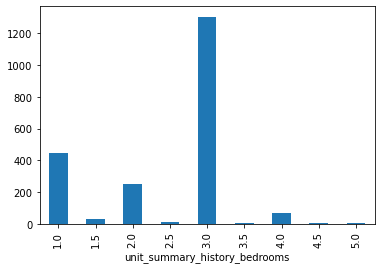

In [13]:
listing_by_room = df.groupby(['unit_summary_history_bedrooms']).size()
listing_by_room.plot(kind="bar");

In [14]:
listing_by_room = listing_by_room.sort_values(ascending=False) 
listing_by_room

unit_summary_history_bedrooms
3.0    1305
1.0     448
2.0     249
4.0      66
1.5      31
2.5      11
3.5       6
4.5       3
5.0       3
dtype: int64

## LR Model

In [15]:
features = ["new_listing_land_area_sqft"]
X_train = df[features]
X_train.shape

(2287, 1)

In [16]:
target = "property_price"
y_train = df[target]
y_train.shape

(2287,)

In [17]:
y_mean = y_train.mean()
y_mean

480044743.40256286

In [18]:
y_pred_baseline = [y_mean]*len(y_train)

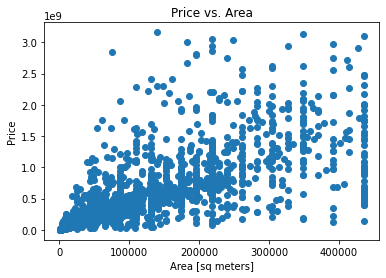

In [19]:
plt.plot(X_train)
plt.scatter(X_train, y_train)
plt.xlabel("Area [sq meters]")
plt.ylabel("Price")
plt.title("Price vs. Area");

In [20]:
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)

print("Mean apt price", round(y_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean apt price 480044743.4
Baseline MAE: 410973613.64


In [21]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [22]:
y_pred_training = model.predict(X_train)
y_pred_training[:5]

array([9.78369931e+07, 4.07811693e+08, 9.94250314e+08, 4.38122176e+08,
       8.77837596e+07])

In [23]:
mae_training = mean_absolute_error(y_train, y_pred_training)
print("Training MAE:", round(mae_training, 2))

Training MAE: 208603484.96


In [24]:
intercept = round(model.intercept_, 2)
print("Model Intercept:", intercept)
assert any([isinstance(intercept, int), isinstance(intercept, float)])

Model Intercept: 72703909.3


In [25]:
coefficient = round(model.coef_[0],2)
print('Model coefficient for "surface_covered_in_m2":', coefficient)
assert any([isinstance(coefficient, int), isinstance(coefficient, float)])

Model coefficient for "surface_covered_in_m2": 3846.51


In [26]:
print(f"apt_price = {intercept} + {coefficient} * surface covered")

apt_price = 72703909.3 + 3846.51 * surface covered
